# Seaborn
- knihovna pro vizualizaci dat v Pythonu
- intuitivní nástroje pro vytváření grafů
- rozšiřuje možnosti knihovny Matplotlib
- integrace s pandas

Rozšíření
- distribuční grafy (histogramy, odhady hustoty rozdělení, boxploty)
- relace mezi proměnnými, porovnání kategorií
- analýza dat, párové a maticové grafy, regresní grafy
- přizpůsobení a styly

In [ ]:
%pip install seaborn

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vytvoření datové sady
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Možnost vykreslit pomocí pandas

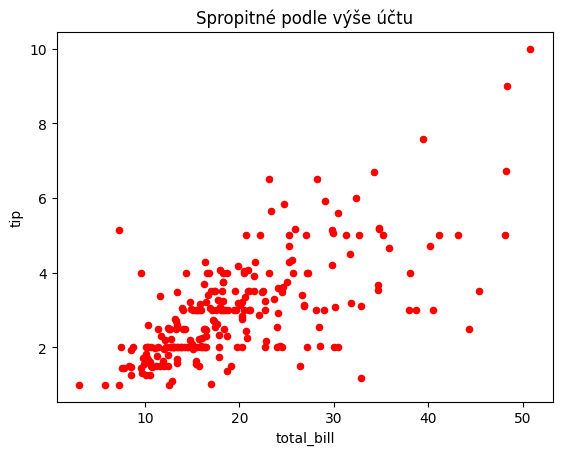

In [10]:
data.plot(kind='scatter', x='total_bill',  y='tip', color='red', title='Spropitné podle výše účtu');

#### Scatterplot 
pomocí Seaborn

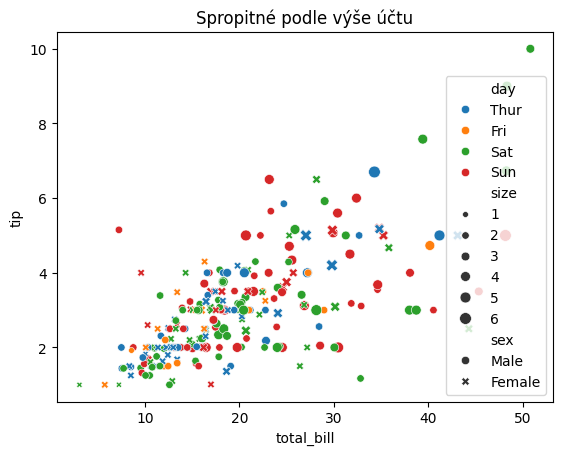

In [3]:
# Základní scatterplot
sns.scatterplot(data=data, x="total_bill", y="tip", hue="day", style="sex", size="size")
plt.title("Spropitné podle výše účtu")
plt.show()

pomocí MatPlotLib

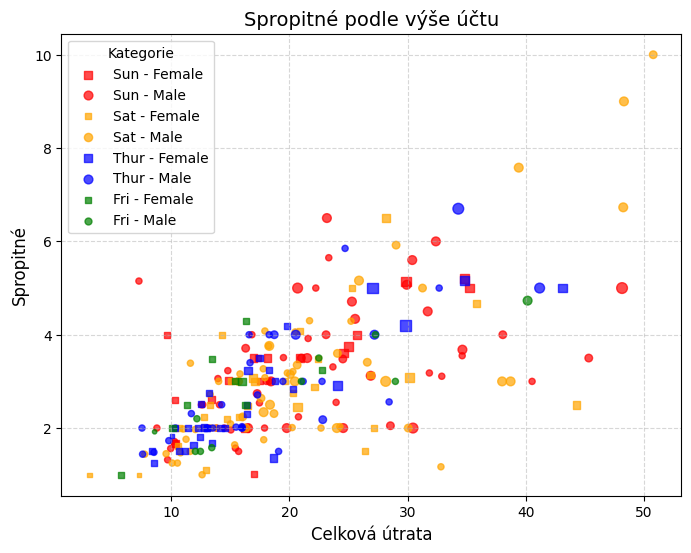

In [4]:
import matplotlib.pyplot as plt
#import pandas as pd

# Rozlišení barev a symbolů podle kategorií
color_map = {"Thur": "blue", "Fri": "green", "Sat": "orange", "Sun": "red"}
marker_map = {"Male": "o", "Female": "s"}

# Vykreslení scatterplotu
plt.figure(figsize=(8, 6))
for day in data["day"].unique():
    for sex in data["sex"].unique():
        subset = data[(data["day"] == day) & (data["sex"] == sex)]
        plt.scatter(
            subset["total_bill"], 
            subset["tip"], 
            label=f"{day} - {sex}", 
            color=color_map[day], 
            marker=marker_map[sex],
            s=subset["size"] * 10,  # Velikost bodů
            alpha=0.7
        )

# Přizpůsobení grafu
plt.title("Spropitné podle výše účtu", fontsize=14)
plt.xlabel("Celková útrata", fontsize=12)
plt.ylabel("Spropitné", fontsize=12)
plt.legend(title="Kategorie")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Heatmapa 
pomocí Seaborn

In [6]:
import numpy as np
# Vytvoření korelační matice pouze pro číselné sloupce
correlation_matrix = data.select_dtypes(include=np.number).corr()

correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


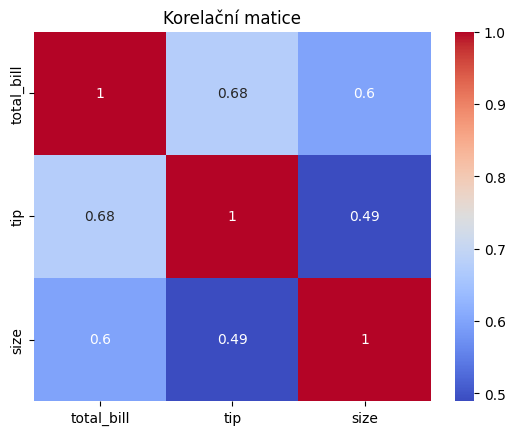

In [7]:
# Heatmapa korelační matice
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Korelační matice")
plt.show()

pomocí MatPlotLib

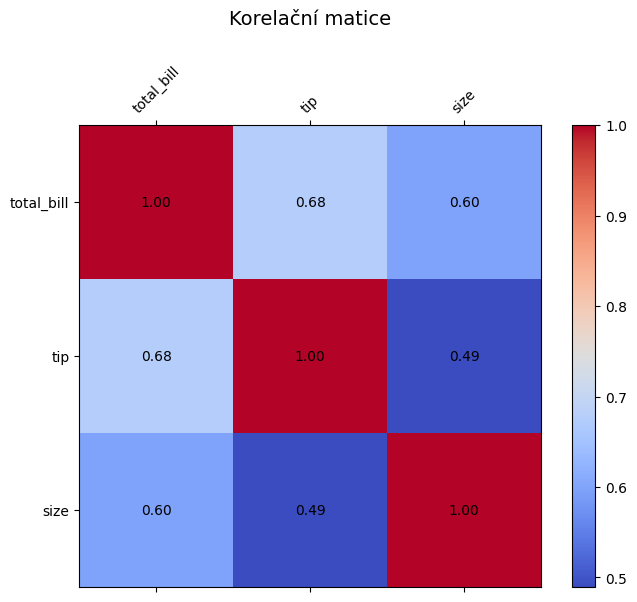

In [8]:
import numpy as np

# Vykreslení heatmapy
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap="coolwarm")

# Přidání popisků
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Přidání čísel hodnot do políček
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f"{val:.2f}", ha="center", va="center", color="black")

# Přidání barevné škály
fig.colorbar(cax)
plt.title("Korelační matice", y=1.2, fontsize=14)
plt.show()


#### Histogram
pomocí Seaborn

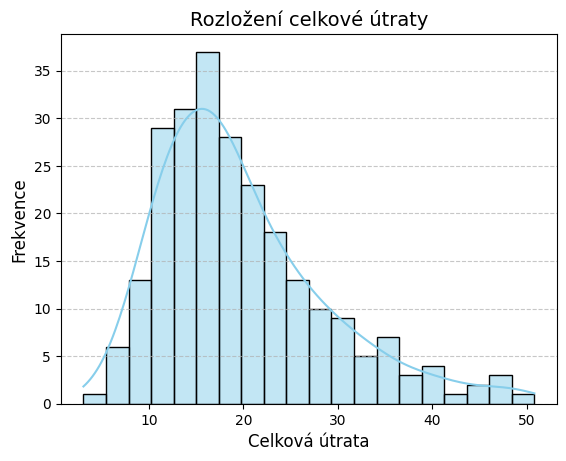

In [9]:

# Vykreslení histogramu pro celkovou útratu
sns.histplot(data=data, x="total_bill", bins=20, kde=True, color="skyblue")

# Přizpůsobení grafu
plt.title("Rozložení celkové útraty", fontsize=14)
plt.xlabel("Celková útrata", fontsize=12)
plt.ylabel("Frekvence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Zobrazení grafu
plt.show()


pomocí MatPlotLib

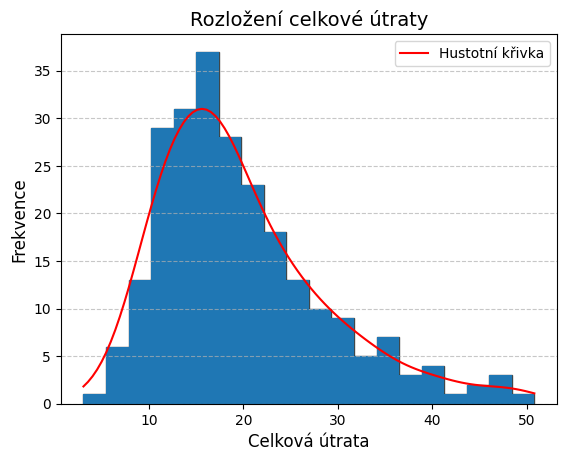

In [11]:
# Vykreslení histogramu
plt.hist(data["total_bill"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)

# Hustotní křivka (ručně vytvořeno)
from scipy.stats import gaussian_kde
density = gaussian_kde(data["total_bill"])
x_vals = np.linspace(min(data["total_bill"]), max(data["total_bill"]), 100)
plt.plot(x_vals, density(x_vals) * len(data["total_bill"]) * np.diff(plt.hist(data["total_bill"], bins=20)[1])[0], color="red", label="Hustotní křivka")

# Přizpůsobení grafu
plt.title("Rozložení celkové útraty", fontsize=14)
plt.xlabel("Celková útrata", fontsize=12)
plt.ylabel("Frekvence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### Boxplot 
pomocí Seaborn

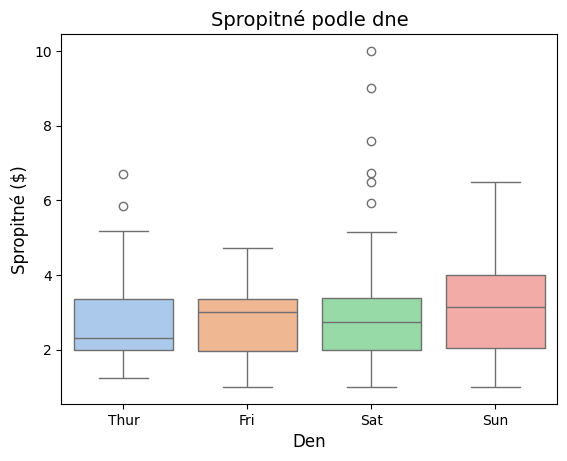

In [12]:
# Boxplot pro spropitné podle dne
sns.boxplot(data=data, x="day", y="tip", hue="day", palette="pastel", dodge=False, legend=False)

# Přizpůsobení grafu
plt.title("Spropitné podle dne", fontsize=14)
plt.xlabel("Den", fontsize=12)
plt.ylabel("Spropitné ($)", fontsize=12)

# Zobrazení grafu
plt.show()


pomocí MatPlotLib

C:\Users\P\AppData\Local\Temp\ipykernel_18504\3443299162.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_day, labels=days, patch_artist=True,


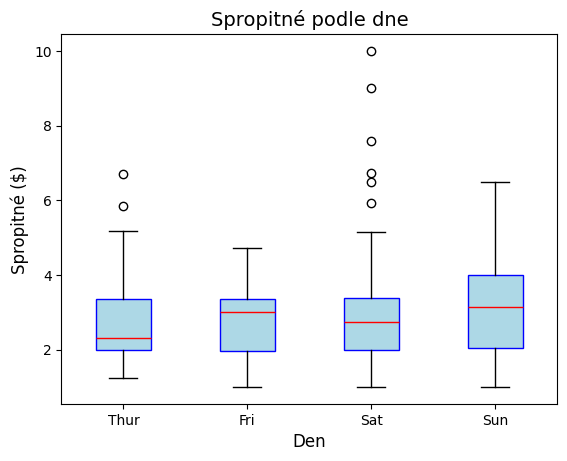

In [13]:
# Připravení dat
days = ["Thur", "Fri", "Sat", "Sun"]
data_by_day = [data[data["day"] == day]["tip"] for day in days]

# Vykreslení boxplotu
plt.boxplot(data_by_day, labels=days, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))

# Přizpůsobení grafu
plt.title("Spropitné podle dne", fontsize=14)
plt.xlabel("Den", fontsize=12)
plt.ylabel("Spropitné ($)", fontsize=12)

# Zobrazení grafu
plt.show()


#### Párový graf
pomocí Seaborn

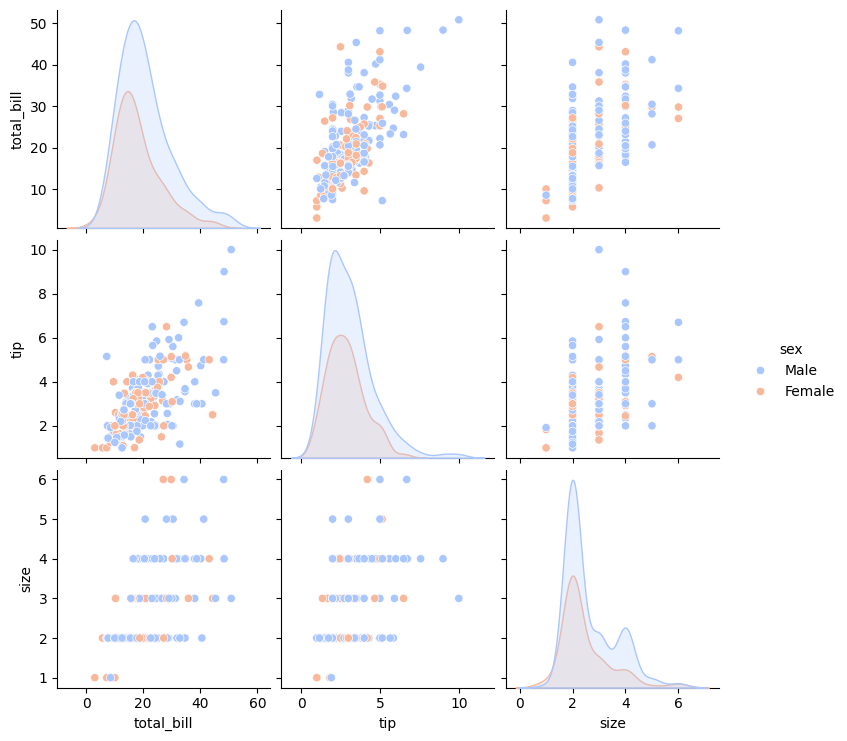

In [14]:
# Párový graf pro číselné proměnné
sns.pairplot(data=data, hue="sex", palette="coolwarm")

# Zobrazení grafu
plt.show()


pomocí MatPlotLib

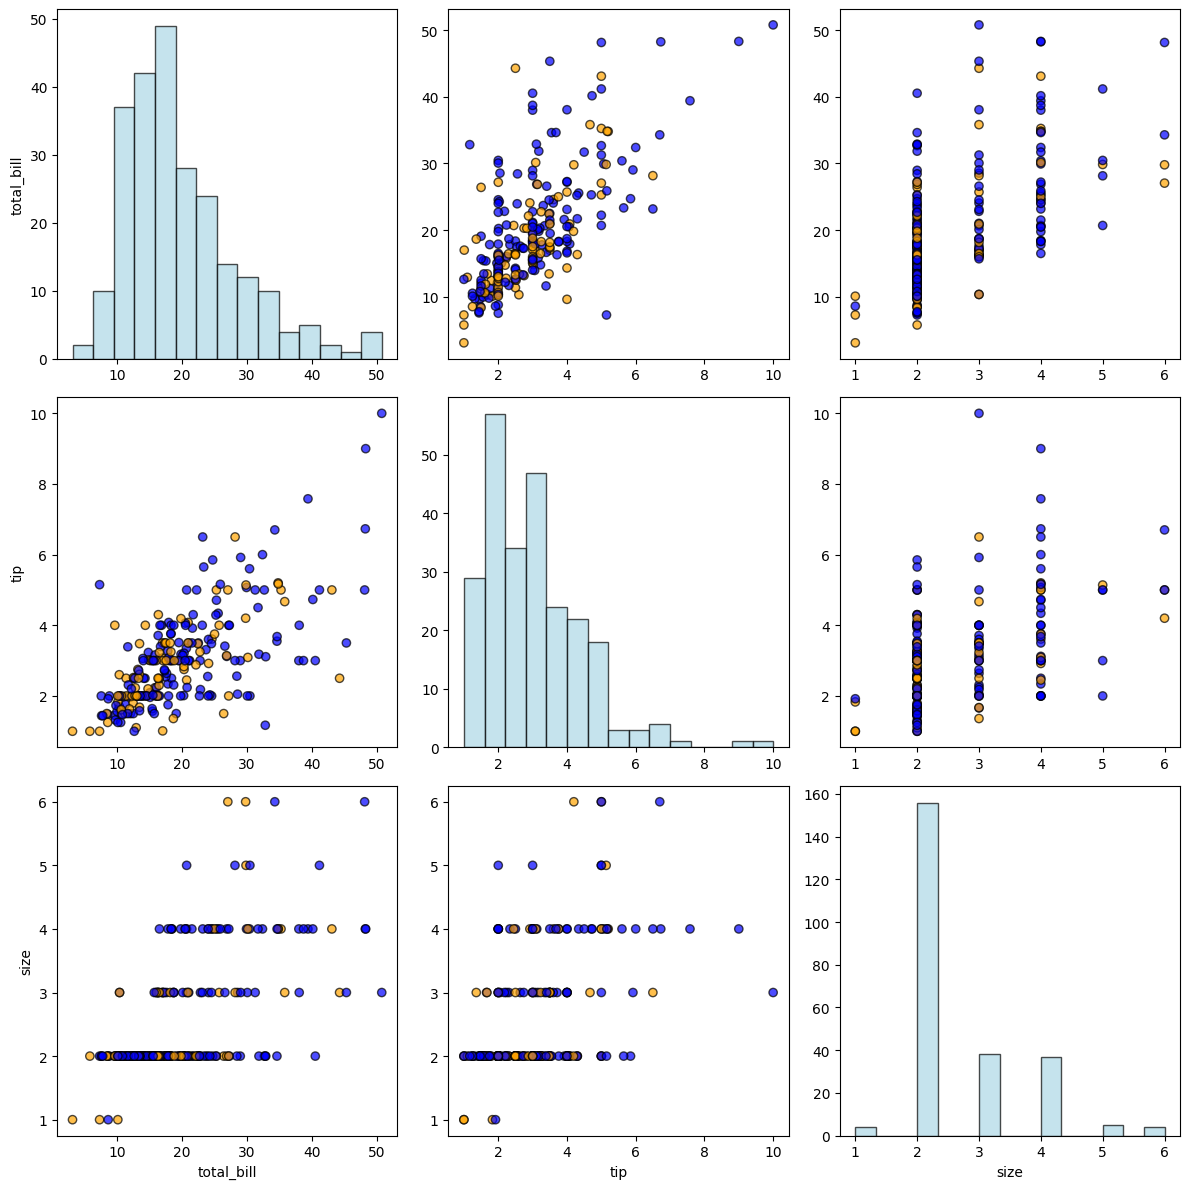

In [15]:
# Vybrání číselných sloupců
numeric_cols = data.select_dtypes(include=np.number).columns
colors = data["sex"].map({"Male": "blue", "Female": "orange"})

# Párové scatterploty
fig, axes = plt.subplots(len(numeric_cols), len(numeric_cols), figsize=(12, 12))
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i == j:
            axes[i, j].hist(data[col1], bins=15, color="lightblue", edgecolor="black", alpha=0.7)
        else:
            axes[i, j].scatter(data[col2], data[col1], c=colors, alpha=0.7, edgecolor="k")
        if j == 0:
            axes[i, j].set_ylabel(col1)
        if i == len(numeric_cols) - 1:
            axes[i, j].set_xlabel(col2)
plt.tight_layout()
plt.show()


,x,y
0,1,10
1,3,25
2,5,35
3,7,33
4,9,41
5,11,59


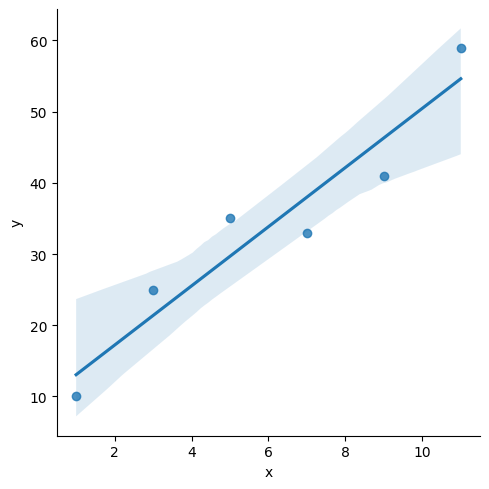

In [3]:
# Import the required libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Create DataFrame
df=pd.DataFrame({'x':[1,3,5,7,9,11],'y':[10,25,35,33,41,59]})
display(df)

# Create lmplot
sns.lmplot(x='x', y='y', data=df)

# Show figure
plt.show()

# Plotly

Open-source knihovna pro vizualizaci a interpretaci dat

#### Moduly plotly
plotly.plotly 
- rozhraní mezi počítačem a Plotly
- obsahuje funkce, které vyžadují odpověď ze serveru Plotly

plotly.graph_objects
- objekty zodpovědné za vytváření grafů
    - obrázek, rozložení, data a definice grafů (bodový graf, spojnicový, ...)
- reprezentace obrázku jako slovník nebo instance plotly.graph_objects.Figure
    - serializovány jako JSON

plotly.express
- dokáže vytvořit celý obrázek najednou
- využívá graph_objects a vrací instanci graph_objects.Figure

In [ ]:
%pip install plotly
%pip install nbformat
# nutný restart notebooku

Nastavení rendereru na plotly

In [11]:
import plotly.io as pio
#pio.renderers.default = "notebook"

In [1]:
import plotly.express as px 
  
# Creating the Figure instance
fig = px.line(x=[1,2, 3], y=[1, 2, 3]) 
 
# printing the figure instance
print(fig)


Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'AQID', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': 'AQID', 'dtype': 'i1'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


In [2]:
fig.show()

In [3]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)

fig.show()

In [4]:
import plotly.express as px
import pandas as pd

# Vytvoření ukázkového datasetu
data = pd.DataFrame({
    "Dny": ["Pondělí", "Úterý", "Středa", "Čtvrtek", "Pátek"],
    "Prodeje": [200, 300, 150, 400, 350]
})

# Vytvoření interaktivního sloupcového grafu
fig = px.bar(data, x="Dny", y="Prodeje", title="Prodeje během týdne", color="Prodeje")

# Zobrazení grafu
fig.show()


In [5]:
import plotly.express as px
import pandas as pd

# Vytvoření ukázkového datasetu
data = pd.DataFrame({
    "Hodnota X": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Hodnota Y": [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "Kategorie": ["A", "B", "A", "B", "A", "B", "A", "B", "A", "B"]
})

# Vytvoření scatter plotu
fig = px.scatter(
    data,
    x="Hodnota X",
    y="Hodnota Y",
    color="Kategorie", # legenda aktivována, pokud parametr rozděluje data do skupin podle barev
    title="Interaktivní Scatter Plot (filtr přes legendu)",
    labels={"Hodnota X": "Osa X", "Hodnota Y": "Osa Y"},
    hover_data=["Kategorie"]
)

# Zobrazení grafu
fig.show()


In [1]:
import pandas as pd
df = pd.read_csv("tmp/selected_data.csv")      # načtení souboru csv
df.head()      

,country,code,region,year,gdp_pc_usd,che_pc_usd
0,Afghanistan,AFG,EMR,2021,372.548784,81.319763
1,Albania,ALB,EUR,2021,6394.970737,464.742859
2,Algeria,DZA,AFR,2021,3700.324153,204.566620
3,Andorra,AND,EUR,2021,42066.041514,3505.991455
4,Angola,AGO,AFR,2021,2167.605349,64.163422


In [7]:
import plotly.express as px
gapminder = px.data.gapminder()
gapminder.query("year==2007").head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [8]:
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [9]:
import numpy as np
import plotly.graph_objects as go

# Definice parametrů
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(-np.pi, np.pi, 50)
U, V = np.meshgrid(u, v)

# Parametrické rovnice
X = np.cos(U)
Y = np.sin(U) + np.cos(V)
Z = np.sin(V)

# Vytvoření interaktivní 3D plochy
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='viridis')])

fig.update_layout(title="Interaktivní parametrická plocha", autosize=True)
fig.show()


# Bokeh
- interaktivní grafy pomocí HTML + JS

In [ ]:
%pip install bokeh

In [15]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show 

# Create the data
x = [1,3,5,7,9,11]
y = [10,25,35,33,41,59]

# Output to notebook 
output_notebook() 

Loading BokehJS ...

In [16]:

# Instantiate a figure 
fig= figure(width = 500, height = 350) 
  
# Create scatter circle marker plot by rendering the circles  
fig.scatter(x, y, size = 10, color = "red", alpha = 0.7) 
  
# Show the plot
show(fig)

In [10]:
# Instantiate a figure 
p = figure(width = 500, height = 350) 
  
# create a line plot 
p.line(x, y,  line_width = 1, color = "blue") 
  
# Show the plot
show(p)

In [11]:
import numpy as np

from bokeh.plotting import figure, show

x = np.linspace(-6, 6, 500)
y = 8*np.sin(x)*np.sinc(x)

p = figure(width=800, height=300, title="", tools="",
           toolbar_location=None, match_aspect=True)

p.line(x, y, color="navy", alpha=0.4, line_width=4)
p.background_fill_color = "#efefef"
p.xaxis.fixed_location = 0
p.yaxis.fixed_location = 0

show(p)

In [ ]:
%pip install bokeh_sampledata

In [21]:
# Import the required modules
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook, show 
from bokeh.layouts import row, column

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

Loading BokehJS ...

Více grafů (row)

In [22]:
# Instantiate a figure 
fig1 = figure(width = 300, height = 300)
fig2 = figure(width = 300, height = 300)
fig3 = figure(width = 300, height = 300)

# Create scatter marker plot by render the circles  
fig1.scatter(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.scatter(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)
fig3.scatter(df['petal_length'], df['petal_width'], size=8,  color = "red", alpha = 0.5)


# Create row layout
row_layout = row(fig1, fig2, fig3)

# Show the plot
show(row_layout)

Více grafů (column)

In [24]:
# Create nested layout
nasted_layout = row(fig1, column(fig2, fig3))

# Show the plot
show(nasted_layout)

Interaktivní grafy

In [31]:
# Instantiate a figure object 
fig = figure(width = 500, height = 350, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width')

# Create scatter marker plot by render the circles  
for specie, color in zip(['setosa', 'virginica','versicolor'], ['blue', 'green', 'red']):
    data = df[df.species==specie]
    fig.scatter('petal_length', 'petal_width', size=8, color=color, alpha = 0.7, legend_label=specie, source=data)

# Set the legend location and click policy
fig.legend.location = 'top_left'
fig.legend.click_policy="hide"

# Show the plot
show(fig)

Popisky

In [37]:
# Create color mapper for categorical column 
mapper = CategoricalColorMapper(factors=['setosa', 'virginica', 'versicolor'], 
                                palette=['blue', 'green', 'red'])

color_dict={'field': 'species','transform': mapper}

# Create hovertool and specify the hovering information
hover = HoverTool(tooltips=[('Species type','@species'),
                            ('IRIS Petal Length','@petal_length'),
                            ('IRIS Petal Width', '@petal_width')])

# Instantiate a figure object
p = figure(width = 500, height = 350, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width',
           tools=[hover, 'pan', 'wheel_zoom'])

# Create scatter marker plot by render the circles  
p.scatter('petal_length', 'petal_width', size=8, color=color_dict, alpha = 0.5,legend_group='species',source=df)

# Set the legend location
p.legend.location = 'top_left'

# Show the plot
show(p)


Panely

In [51]:
from bokeh.models import TabPanel, Tabs

# Instantiate a figure 
fig1 = figure(width = 500, height = 300)
fig2 = figure(width = 500, height = 300)

# Create scatter marker plot by render the circles  
fig1.scatter(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.scatter(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)


# Create panels 
tab1 = TabPanel(child=fig1, title='tab1')
tab2 = TabPanel(child=fig2, title='tab2')

# Create tab by putting panels into it
tab_layout = Tabs(tabs=[tab1,tab2])

# Show the plot
show(tab_layout)

Interaktivita - posuvníky

In [56]:
from bokeh.models import CustomJS 
from bokeh.models import ColumnDataSource
from bokeh.models import Slider
from bokeh.layouts import column

# Create list of data
x = [x for x in range(0, 100)]
y = x

# Create a DataFrame
df = ColumnDataSource(data={"x_values":x, "y_values":y})

# Instantiate the Figure object 
fig = figure(width=600, height=350)

# Create a line plot  
fig.line('x_values', 'y_values', source=df, line_width=2.5, line_alpha=0.8)

# Create a callback using CustomJS
callback = CustomJS(args=dict(source=df), code="""
    var data = source.data;
    var f = cb_obj.value
    var x_values = data['x_values']
    var y_values = data['y_values']
    for (var i = 0; i < x_values.length; i++) {
        y_values[i] = Math.pow(x_values[i], f)
    }
    source.change.emit();
""")

slider_widget = Slider(start=0.0, end=10, value=1, step=.1, title="Display power of x")

slider_widget.js_on_change('value', callback)

# Create layout
slider_widget_layout = column(fig,slider_widget)

# Display the layout
show(slider_widget_layout)

# Dash
framework pro psaní interaktivních webových aplikací

Založen na
- plotly (grafy)
- flask (webový backend)
- react (frontend)

In [ ]:
! pip install dash   
! pip install dash-html-components                                         
! pip install dash-core-components                                     
! pip install plotly

In [ ]:
import dash
from dash import html
from dash import dcc
import plotly.graph_objects as go
import plotly.express as px

Výstupy aplikací na http://127.0.0.1:8050/ 

In [ ]:
import dash
from dash import html

# Inicializace aplikace
app = dash.Dash(__name__)

# Layout aplikace (statický HTML obsah)
app.layout = html.Div([
    html.H1("Moje Dash aplikace"),
    html.P("Toto je statická stránka v Dash."),
    html.Ul([
        html.Li("První položka"),
        html.Li("Druhá položka"),
        html.Li("Třetí položka"),
    ]),
    html.Img(src="https://www.ujep.cz/wp-content/themes/ujep/img-ujep/logo.png", style={"width": "200px"})
])

# Spuštění aplikace
if __name__ == '__main__':
    app.run_server(debug=False)


Callbacks propojují vstupy a výstupy. Každá funkce je volána automaticky, když se změní vstup.

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Inicializace aplikace
app = dash.Dash(__name__)

# Layout aplikace
app.layout = html.Div([
    html.H1("Interaktivní Dash aplikace"),
    dcc.Input(id="vstup", type="text", value="Ahoj"),
    html.Div(id="vystup")
])

# Callback pro interaktivitu
@app.callback(
    Output("vystup", "children"),
    Input("vstup", "value")
)
def update_output(value):
    return f"Bylo zadáno: {value}"

# Spuštění aplikace
if __name__ == '__main__':
    app.run_server(debug=False)


#### Jednoduchý příklad s grafem

nejdříve připravíme data

In [ ]:
# assume you have a "long-form" data frame
import pandas as pd
df = pd.DataFrame({
    "Ovoce": ["Jablka", "Hrušky", "Broskve", "Jablka", "Hrušky", "Broskve"],
    "Množství": [4, 1, 2, 2, 4, 5],
    "Město": ["Praha", "Praha", "Praha", "Brno", "Brno", "Brno"]
})
df

,Ovoce,Množství,Město
0,Jablka,4,Praha
1,Hrušky,1,Praha
2,Broskve,2,Praha
3,Jablka,2,Brno
4,Hrušky,4,Brno
5,Broskve,5,Brno


In [ ]:
import dash
from dash import html
from dash import dcc
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash()

fig = px.bar(df, x="Ovoce", y="Množství", color="Město", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Dash aplikace s grafem'),

    html.Div(children='''
        Dash: webový framework pro vaše data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server()

In [ ]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd

# Inicializace aplikace
app = dash.Dash(__name__)

# Načtení dat
df = px.data.iris()  # Vestavěný dataset s květinami

# Vytvoření grafu pomocí Plotly
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", title="Graf Sepal Width vs Sepal Length")

# Layout aplikace (statická stránka s grafem)
app.layout = html.Div([
    html.H1("Dash aplikace s grafem"),
    html.P("Toto je statický graf vytvořený pomocí Plotly."),
    dcc.Graph(figure=fig)  # Zobrazení grafu
])

# Spuštění aplikace
if __name__ == '__main__':
    app.run_server()


#### Interaktivita v grafech

Vytvoření rozložení stránky

In [ ]:
import dash
from dash import html
from dash import dcc
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash()

# vytvoření bloku s rozložením
app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Interaktivní graf',\
                    style = {'textAlign':'center',\
                    'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label': 'Položka 1', 'value':'p1'},
            {'label': 'Položka 2', 'value':'p2'},
            {'label': 'Položka 3', 'value':'p3'},
            ],
        value = 'p1'),
        dcc.Graph(id = 'bar_plot')              # zatím nic neobsahuje
    ])


if __name__ == '__main__': 
    app.run_server()

Vytvoření vzorových dat

In [ ]:
import pandas as pd
f = {"a": "p1", "b": 1.0, "c": 2.0}
print(f)
pd.Series(f)

d = {
    "x": pd.Series([1.0, 2.0, 3.0, 4.0]),
    "p1": pd.Series([1.0, 2.0, 3.0, 4.0]),
    "p2": pd.Series([1.0, 4.0, 9.0, 16.0]),
    "p3": pd.Series([5.0, 4.0, 2.0, 1.0]),
}
dframe = pd.DataFrame(d)
dframe

{'a': 'p1', 'b': 1.0, 'c': 2.0}


,x,p1,p2,p3
0,1.0,1.0,1.0,5.0
1,2.0,2.0,4.0,4.0
2,3.0,3.0,9.0,2.0
3,4.0,4.0,16.0,1.0


Vytvoření a naplnění grafu

In [ ]:
# funkce zpětného volání: 
# automaticky volány, kdykoli se změní vlastnost vstupní komponenty, 
# aby se aktualizovala výstupní komponenta
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
# funkce, která vrací spojnicový graf (data df)
def graph_update(dropdown_value):
    print(dropdown_value)                   # položka z ComboBoxu
   
    fig = go.Figure([go.Scatter(x = dframe['x'], y = dframe['{}'.format(dropdown_value)],\
                     line = dict(color = 'blue', width = 4))
                     ])
    
    fig.update_layout(title = 'Graf',       # popis grafu
                      xaxis_title = 'x',
                      yaxis_title = 'y'
                      )
    return fig


if __name__ == '__main__':
    app.run_server()

p1


Příklad s předdefinovanými hodnotami

In [ ]:
print(px.data.stocks().dtypes)
print(type(px.data.stocks()))
px.data.stocks()

date     object
GOOG    float64
AAPL    float64
AMZN    float64
FB      float64
NFLX    float64
MSFT    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>


,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [ ]:
import dash
from dash import html
from dash import dcc
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input, Output


app = dash.Dash()
df = px.data.stocks()

# vytvoření bloku s rozložením
app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Styling using html components',\
                    style = {'textAlign':'center',\
                    'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Google', 'value':'GOOG' },
            {'label': 'Apple', 'value':'AAPL'},
            {'label': 'Amazon', 'value':'AMZN'},
            ],
        value = 'GOOG'),
        dcc.Graph(id = 'bar_plot')
    ])
    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
# funkce, která vrací spojnicový graf (data df)
def graph_update(dropdown_value):           
    print(dropdown_value)
    fig = go.Figure([go.Scatter(x = df['date'], y = df['{}'.format(dropdown_value)],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
    
    fig.update_layout(title = 'Stock prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
    return fig  


if __name__ == '__main__': 
    app.run_server()

GOOG
